In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

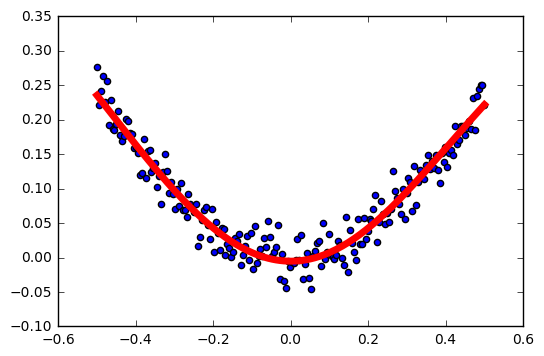

In [11]:
#使用numpy生成200个随机点，在某一个区间范围
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

#定义两个placehold
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

#构建一个神经网络进行回归，构建一个神经网络中的中间层
#Weights:权重；Biases：偏置值
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
Biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + Biases_L1

L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
Biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + Biases_L2

prediction = tf.nn.tanh(Wx_plus_b_L2)

#二次代价函数和梯度下降法
loss = tf.reduce_mean(tf.square(y-prediction))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(20000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()

